In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('churn_lloyds.csv')
# print(df.head())
# df.describe()
df['Unresolved%'] = df['Unresolved%'].str.replace('%', '', regex=False).astype(float)
median_val = df['Unresolved%'].median()
df['Unresolved%'] = df['Unresolved%'].fillna(median_val)
df['Complaint%'] = df['Complaint%'].str.replace('%','', regex=False).astype(float)
df['Complaint%'] = df['Complaint%'].fillna(df['Complaint%'].median())
# print(df.head())
count_na = df.isnull().sum()
print(count_na)
print(df.shape)


CustomerID        0
ChurnStatus       0
Age               0
Gender            0
MaritalStatus     0
IncomeLevel       0
TotalAmount       0
LoginFrequency    0
ServiceUsage      0
Unresolved%       0
Complaint%        0
dtype: int64
(1000, 11)


ChurnStatus      0   1
MaritalStatus         
Divorced       202  46
Married        201  60
Single         171  44
Widowed        222  54


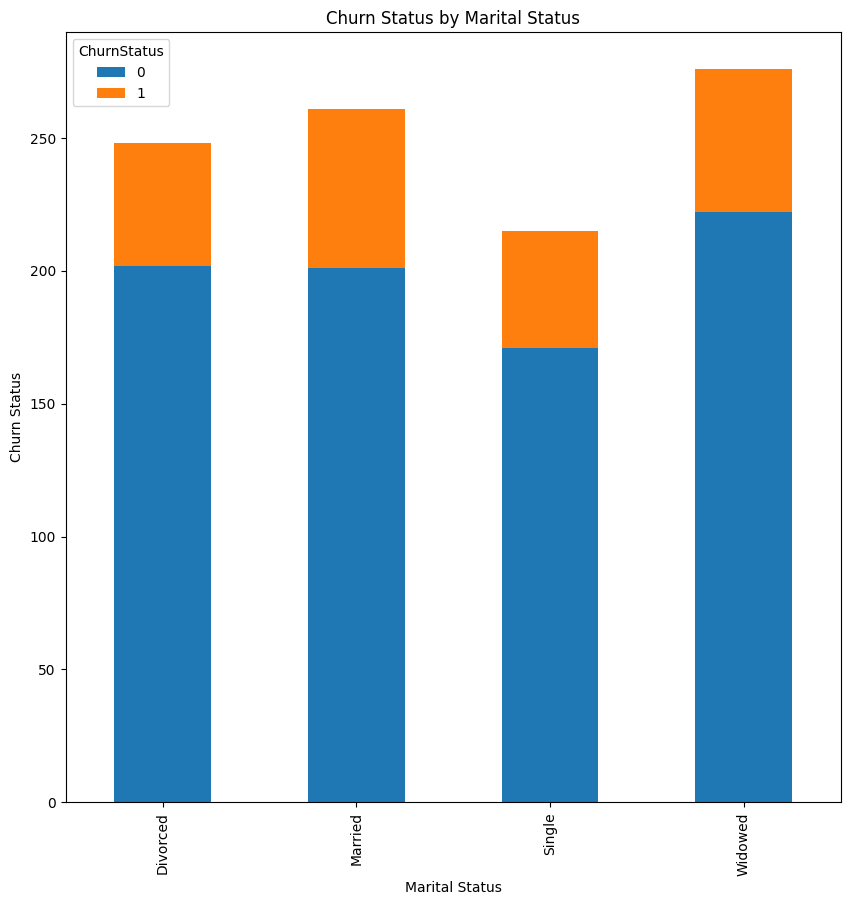

In [36]:
crosstab_df = pd.crosstab(df['MaritalStatus'], df['ChurnStatus'])
print(crosstab_df.head())
crosstab_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus    0    1
Gender               
F            412  101
M            384  103


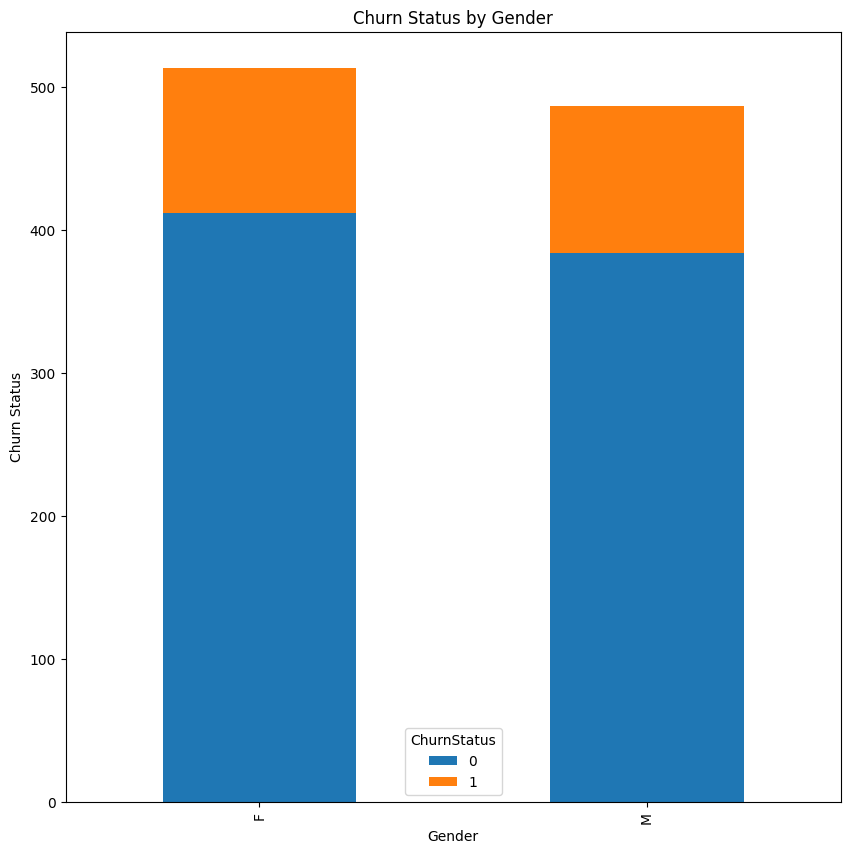

In [37]:
crosstab_df2 = pd.crosstab(df['Gender'], df['ChurnStatus'])
print(crosstab_df2.head())
crosstab_df2.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus    0   1
IncomeLevel         
High         282  67
Low          253  72
Medium       261  65


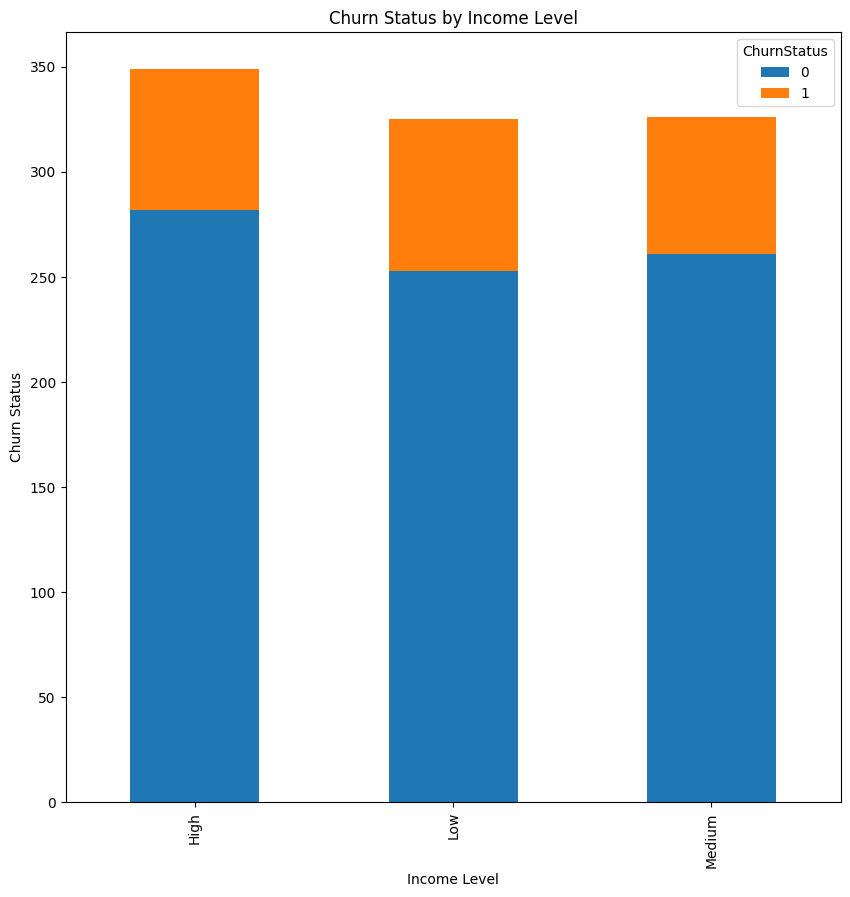

In [38]:
crosstab_df3 = pd.crosstab(df['IncomeLevel'], df['ChurnStatus'])
print(crosstab_df3.head())
crosstab_df3.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus       0   1
ServiceUsage           
Mobile App      263  79
Online Banking  279  70
Website         254  55


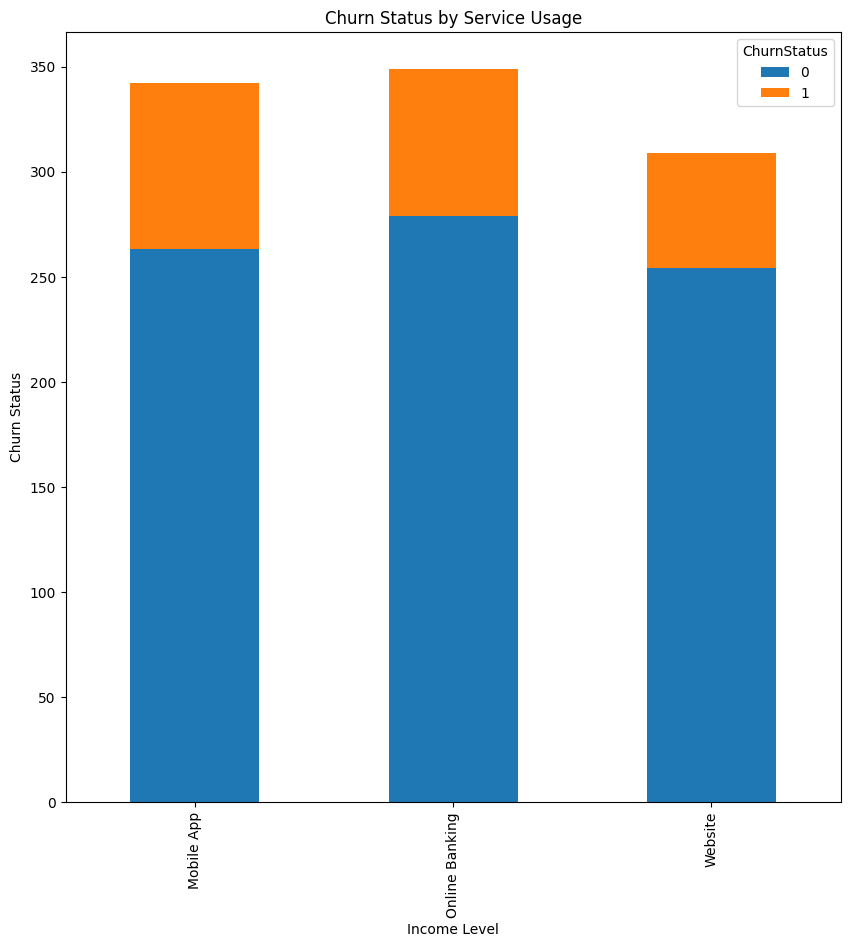

In [39]:
crosstab_df4 = pd.crosstab(df['ServiceUsage'], df['ChurnStatus'])
print(crosstab_df4.head())
crosstab_df4.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Service Usage')
plt.xlabel('Income Level')
plt.ylabel('Churn Status')
plt.show()

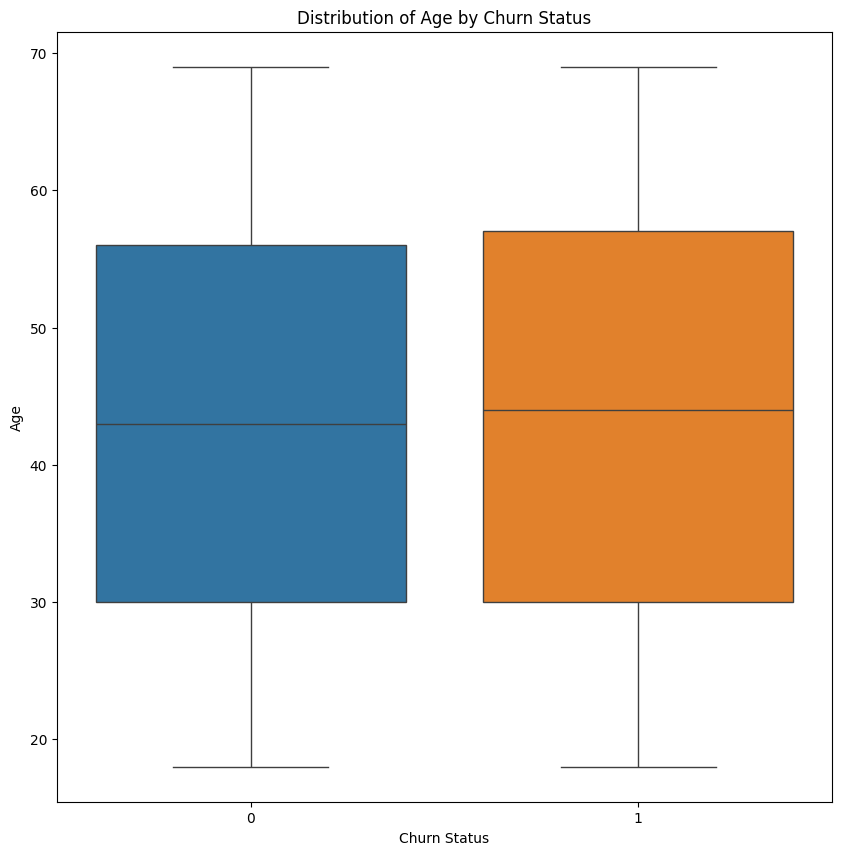

In [40]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=df['ChurnStatus'],
    y=df['Age'],
    data = df,
    hue='ChurnStatus',
    legend = False

)

plt.title('Distribution of Age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

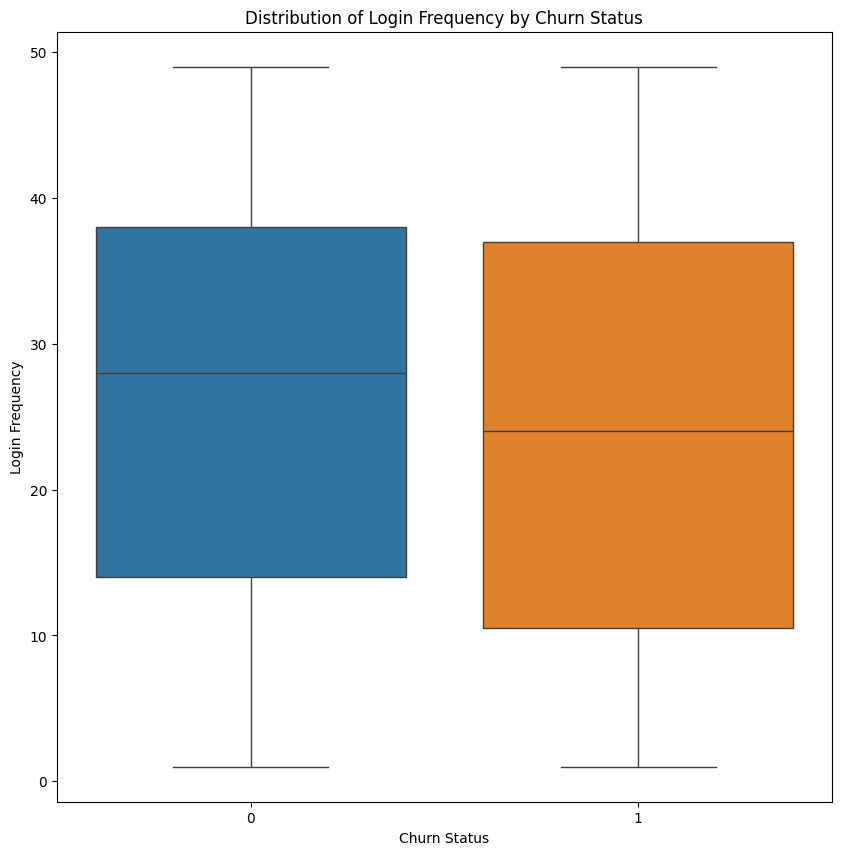

In [41]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=df['ChurnStatus'],
    y=df['LoginFrequency'],
    data = df,
    hue='ChurnStatus',
    legend = False

)

plt.title('Distribution of Login Frequency by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Login Frequency')
plt.show()

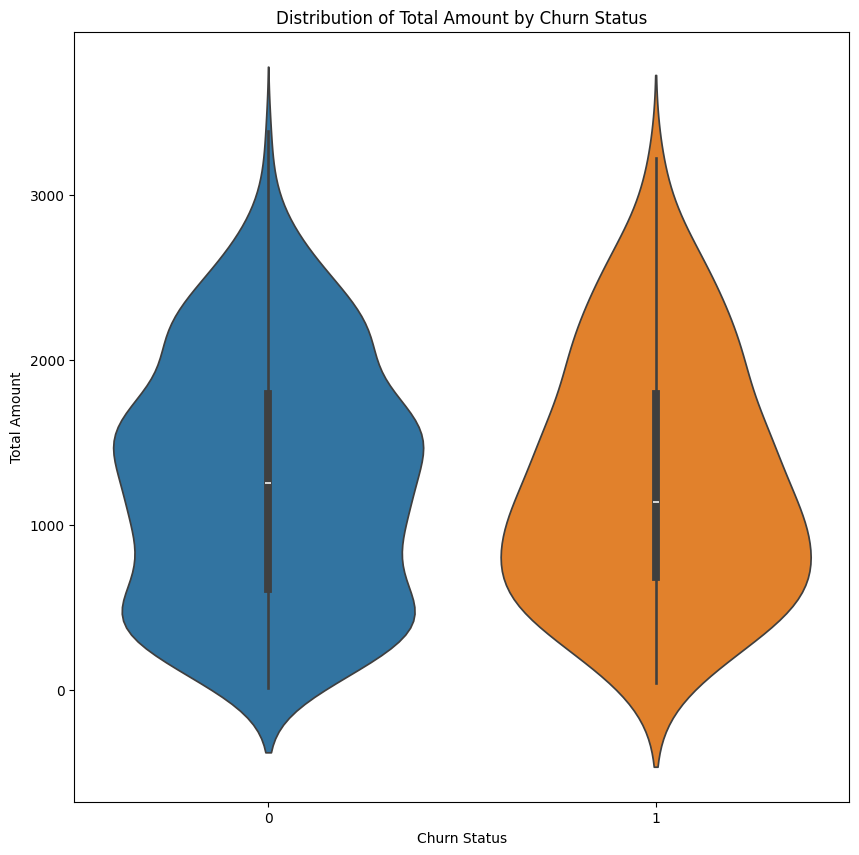

In [42]:
plt.figure(figsize=(10, 10))
sns.violinplot(
    x=df['ChurnStatus'],
    y=df['TotalAmount'],
    data = df,
    hue='ChurnStatus',
    legend=False
)

plt.title('Distribution of Total Amount by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Amount')
plt.show()

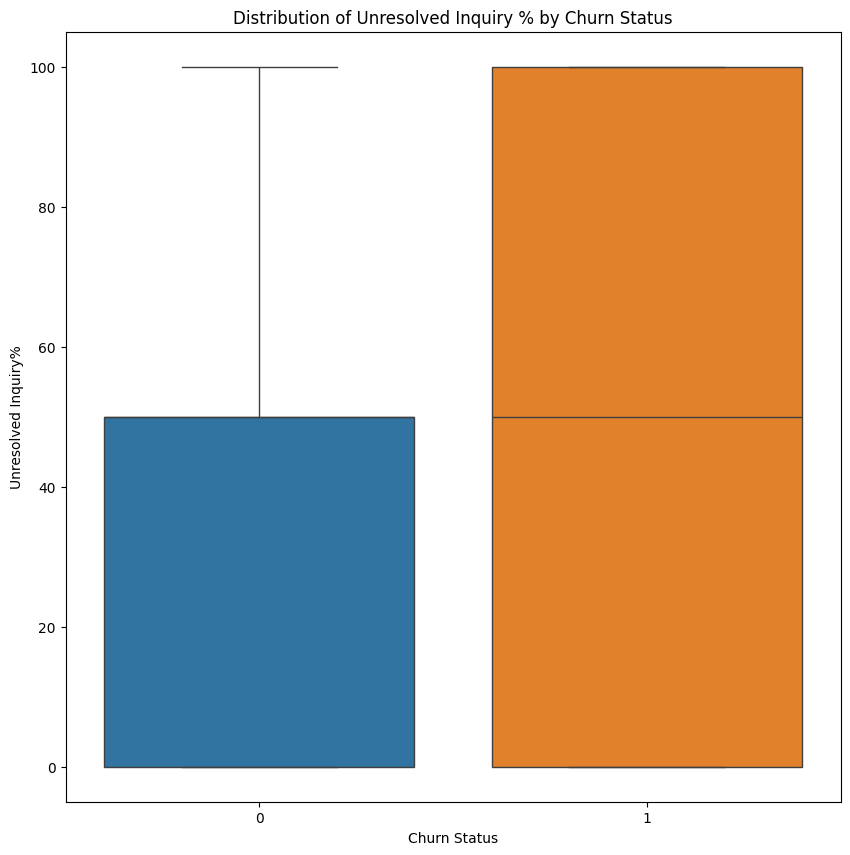

In [43]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=df['ChurnStatus'],
    y=df['Unresolved%'],
    data = df,
    hue='ChurnStatus',
    legend = False

)

plt.title('Distribution of Unresolved Inquiry % by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Unresolved Inquiry%')
plt.show()

In [45]:
categorical_fatures = ['Gender', 'MaritalStatus', 'ServiceUsage']
ordinal_features = ['IncomeLevel']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         categorical_fatures),

        ('ordinal',
         OrdinalEncoder(categories=[['Low', 'Medium', 'High']]),
        ordinal_features)

    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
df_processed = pd.DataFrame(processed_data, columns=feature_names)
print(df_processed.head())

   onehot__Gender_F  onehot__Gender_M  onehot__MaritalStatus_Divorced  \
0               0.0               1.0                             0.0   
1               0.0               1.0                             0.0   
2               0.0               1.0                             0.0   
3               0.0               1.0                             0.0   
4               0.0               1.0                             1.0   

   onehot__MaritalStatus_Married  onehot__MaritalStatus_Single  \
0                            0.0                           1.0   
1                            1.0                           0.0   
2                            0.0                           1.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   onehot__MaritalStatus_Widowed  onehot__ServiceUsage_Mobile App  \
0                            0.0                              1.0   
1                         